## Name: Karma Tarap
### CSCI E-89C Deep Reinforcement Learning  
### Part II of Assignment 1

# Preface

In the example below, we have two classes, Environment and Agent. The Environment has 4 possible actions in all states (there are no states actually in this case but states can be easily added to the class) and regardless of the Agent's action the Environment generates a reward from normal distribution with mean 6 and variance 1. The Agent can choose one of the actions available to it and picks them at random. Then we run the experiment for 100 time steps by calling rewards_hist(100) and observe historical rewards.    

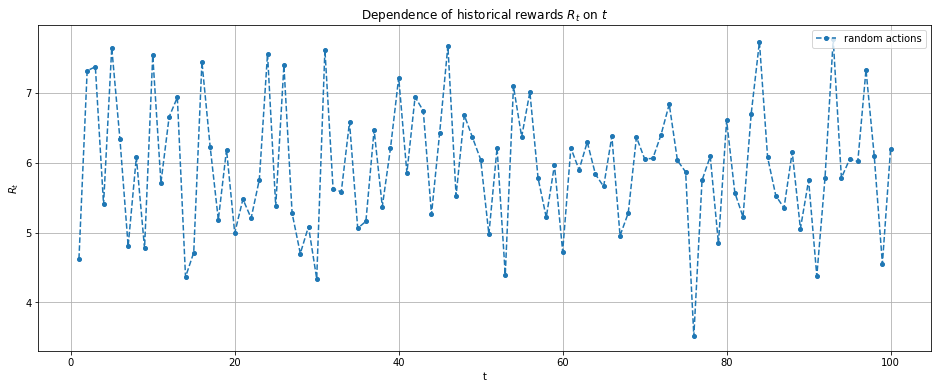

In [49]:
import random
from matplotlib import pyplot as plt 
import numpy as np
%matplotlib inline

class Environment:
    def __init__(self):
        self.time = 1

    def admissible_actions(self):
        return list(range(1,5))

    def get_reward(self, action):
        self.time += 1
        return random.gauss(6,1)


class Agent:
    def __init__(self):
        self.current_reward = 0.0

    def step(self, env):
        actions = env.admissible_actions()
        reward = env.get_reward(random.choice(actions))
        self.current_reward = reward
        
        
def rewards_hist(T = 10):
    env = Environment()
    agent = Agent()
    rewards = []
    while env.time <= T:
        agent.step(env)
        rewards.append(agent.current_reward)
    return np.asarray(rewards)


from matplotlib import pyplot as plt 
import numpy as np   
T = 100

plt.figure(figsize=(16,6))
plt.plot(range(1,T+1),rewards_hist(T), linestyle='--', marker='o', markersize=4, label='random actions')
plt.xlabel("t")
plt.ylabel("$R_t$")
plt.title('Dependence of historical rewards $R_t$ on $t$')
plt.grid(True)
plt.legend(loc = 'upper right')
plt.show()

## Problem 1 (5 points)

Please modify the Environment so that it generates rewards with mean 4, 6, 8, and 10 for actions 1, 2, 3, and 4, respectively. Please keep unit variance in all cases. Plot your historical rewards for 1, 2,..., T, where T = 100.

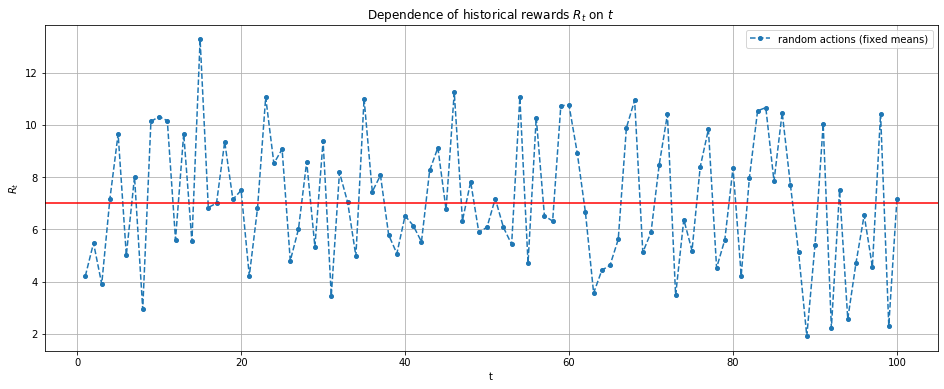

In [50]:
class Environment:
    def __init__(self):
        self.time = 1
        self._means = (4, 6, 8, 10)
        
    def admissible_actions(self):
        return list(range(1,5))

    def get_reward(self, action):
        self.time += 1
        return random.gauss(self._means[action-1],1)
    

plt.figure(figsize=(16,6))
plt.plot(range(1,T+1),rewards_hist(T), linestyle='--', marker='o', markersize=4, label='random actions (fixed means)')
plt.axhline(7, color='r') #Expected Reward at time t
plt.xlabel("t")
plt.ylabel("$R_t$")
plt.title('Dependence of historical rewards $R_t$ on $t$')
plt.grid(True)
plt.legend(loc = 'upper right')
plt.show()

## Problem 2 (10 points)

Modify the Agent so that it follows the $\varepsilon$-greedy selection method with $\varepsilon$ = 0.10 and the action value estimated by (2.3) of "Reinforcement Learning" by Sutton and Barto. Using this method and the Environment from Problem 1, plot observed historical rewards for 1, 2,..., T, where T = 100.

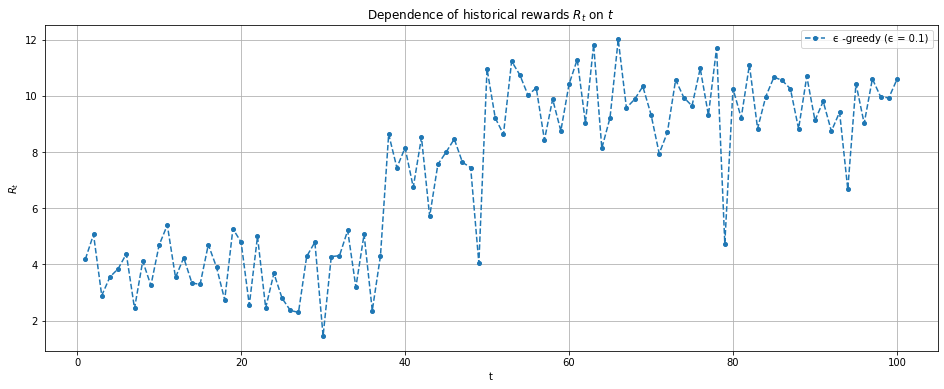

In [51]:
class Agent:
    def __init__(self):
        self.epsilon = .1
        self.current_reward = 0.0
        self.avg_rewards = np.zeros(4)

    def step(self, env):
        # Exploration
        if random.random() < self.epsilon:
            action = random.choice(env.admissible_actions())
            reward = env.get_reward(action) 
        # Greedy
        else:
            action = np.argmax(self.avg_rewards) + 1
            reward = env.get_reward(action)
        idx = action - 1 
        self.current_reward = reward
        self.avg_rewards[idx] = self.avg_rewards[idx] + np.mean(self.current_reward - self.avg_rewards[idx])
        
        
def rewards_hist(T = 10):
    env = Environment()
    agent = Agent()
    rewards = []
    while env.time <= T:
        agent.step(env)
        rewards.append(agent.current_reward)
    return np.asarray(rewards)

T = 100

plt.figure(figsize=(16,6))
plt.plot(range(1,T+1),rewards_hist(T), linestyle='--', marker='o', markersize=4, label='ϵ -greedy (ϵ = 0.1)')
plt.xlabel("t")
plt.ylabel("$R_t$")
plt.title('Dependence of historical rewards $R_t$ on $t$')
plt.grid(True)
plt.legend(loc = 'upper right')
plt.show()

## Problem 3 (5 points)

Run the algorithm obtained in Problem 2 for 200 times (i.e. for 200 epochs) for T = 1000, and compute the observed average reward for each time t. Plot the average reward from those 200 epochs for 1, 2,..., T. Please notice that T = 1000 this time.

In [52]:
T = 1000

avg_reward = np.mean(np.array([rewards_hist(T) for _ in range(200)]),axis=0)

9.489968027248517

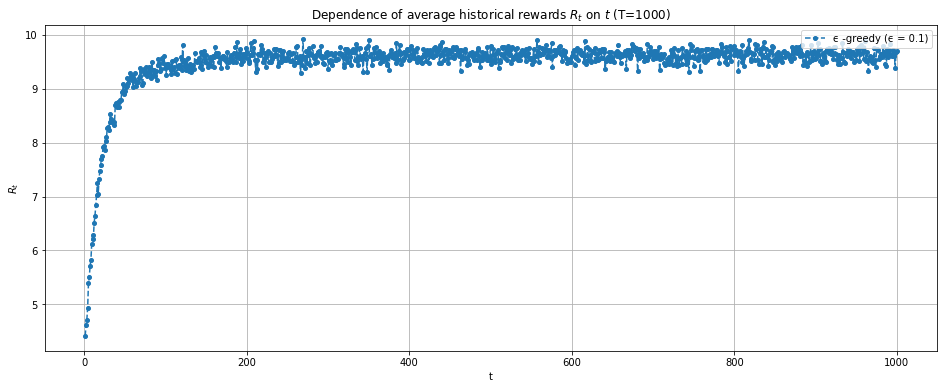

In [54]:

plt.figure(figsize=(16,6))
plt.plot(range(1,T+1),avg_reward, linestyle='--', marker='o', markersize=4, label='ϵ -greedy (ϵ = 0.1)')
plt.xlabel("t")
plt.ylabel("$R_t$")
plt.title('Dependence of average historical rewards $R_t$ on $t$ (T=1000)')
plt.grid(True)
plt.legend(loc = 'upper right')
plt.show()

$$\sum{a}$$